In [2]:
#Our imports
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#for our text cleaning
import neattext.functions as nfx

In [3]:
#Our text data
data = pd.read_csv("C:/Users/user pc/Downloads/Emotion Dataset/text.csv")
data

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [ ]:
##The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), 
##and surprise (5)

In [4]:
#We check for missing values
data.isna().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
data['label'].value_counts()

1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

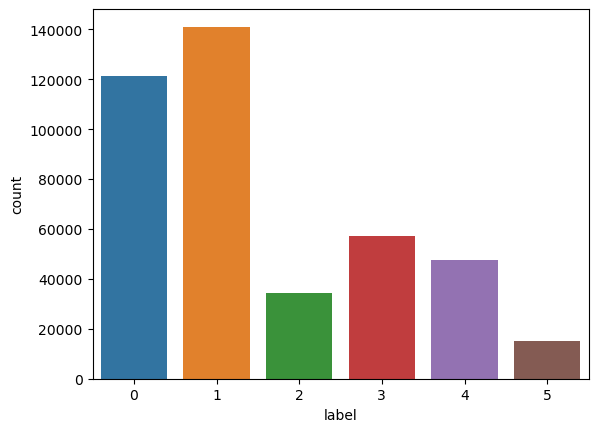

In [9]:
#plotting our labels
sns.countplot(x='label',data=data)
##The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), 
##and surprise (5)

In [10]:
#TEXT CLEANING AND FOPRMATTING
#remove noise(stopwords,punctuation,emojis,special characters)

In [12]:
data['Emotion'] = data['label']

In [15]:
data.replace({'Emotion': {0:'sadness', 1:'joy',2:'love',3:'anger',4:'fear',5:'suprise'}},inplace=True)
data.head()

,text,label,Emotion
0,i just feel really helpless and heavy hearted,4,fear
1,ive enjoyed being able to slouch about relax a...,0,sadness
2,i gave up my internship with the dmrg and am f...,4,fear
3,i dont know i feel so lost,0,sadness
4,i am a kindergarten teacher and i am thoroughl...,4,fear


In [16]:
#cleaning our text using NEATTEXT 
data['clean_text'] = data['text'].apply(nfx.remove_stopwords)
data['clean_text'] = data['clean_text'].apply(nfx.remove_special_characters)
data['clean_text'] = data['clean_text'].apply(nfx.remove_punctuations)

In [17]:
data.head()

,text,label,Emotion,clean_text
0,i just feel really helpless and heavy hearted,4,fear,feel helpless heavy hearted
1,ive enjoyed being able to slouch about relax a...,0,sadness,ive enjoyed able slouch relax unwind frankly n...
2,i gave up my internship with the dmrg and am f...,4,fear,gave internship dmrg feeling distraught
3,i dont know i feel so lost,0,sadness,dont know feel lost
4,i am a kindergarten teacher and i am thoroughl...,4,fear,kindergarten teacher thoroughly weary job take...


In [19]:
#SENTIMENT ANALYSIS
from textblob import TextBlob

In [20]:
def our_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = 'Positive'
    elif sentiment < 0:
        result = 'Negative'
    else:
        result = 'Neutral'
    return result

In [22]:
print(our_sentiment('i love you'))
print(our_sentiment('i hate you'))

Positive
Negative


In [23]:
data['sentiment'] = data['clean_text'].apply(our_sentiment)

In [24]:
data.head()

,text,label,Emotion,clean_text,sentiment
0,i just feel really helpless and heavy hearted,4,fear,feel helpless heavy hearted,Negative
1,ive enjoyed being able to slouch about relax a...,0,sadness,ive enjoyed able slouch relax unwind frankly n...,Positive
2,i gave up my internship with the dmrg and am f...,4,fear,gave internship dmrg feeling distraught,Negative
3,i dont know i feel so lost,0,sadness,dont know feel lost,Neutral
4,i am a kindergarten teacher and i am thoroughl...,4,fear,kindergarten teacher thoroughly weary job take...,Neutral


In [25]:
#Emotion vs Sentioment
data.groupby(['Emotion','sentiment']).size()

Emotion  sentiment
anger    Negative     28289
         Neutral      17510
         Positive     11518
fear     Negative     22065
         Neutral      15355
         Positive     10292
joy      Negative     13910
         Neutral      28236
         Positive     98921
love     Negative      6810
         Neutral       6871
         Positive     20873
sadness  Negative     58694
         Neutral      38170
         Positive     24323
suprise  Negative      6194
         Neutral       1717
         Positive      7061
dtype: int64

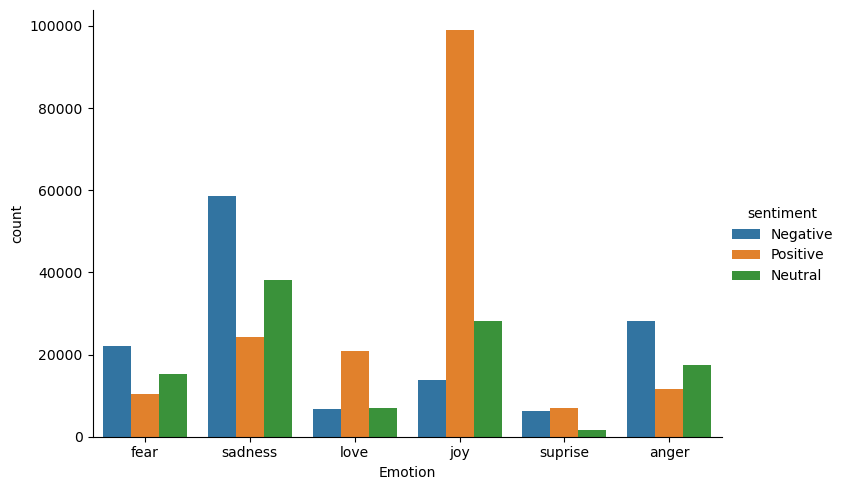

In [27]:
#plot the comparison
sns.catplot(x='Emotion',hue='sentiment',data=data,kind='count',aspect=1.5)

In [28]:
#keyword extraction
#extracting the most common keywords in a class
from collections import Counter

In [38]:
#extracting keyword function
def extract_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_token = Counter(tokens).most_common(num)
    return dict(most_common_token)

In [31]:
#emotions
emotion_list = data['Emotion'].unique().tolist()
emotion_list

['fear', 'sadness', 'love', 'joy', 'suprise', 'anger']

In [33]:
#we now go through the clean txt to see the emotion tokens
data[data['Emotion'] == 'joy']['clean_text']

7         fear feel delicious excitement christmas eve w...
10        try nice bitchy person phone window feel free ...
12         officially graduated im feeling ecstatic thought
14        feel portfolio demonstrates eager learn know b...
15           biased dependent life care safe feel need care
                                ...                        
416796                      im feeling inspired drama today
416800    know today feel like looks cool know somedays ...
416801              feel like fully resolved felt right ask
416802                 feel like neglecting faithful reader
416803    cry feel sense loss patients die helped die di...
Name: clean_text, Length: 141067, dtype: object

In [34]:
#we convert it into a list of tokens
joy_list = data[data['Emotion'] == 'joy']['clean_text'].tolist()

In [37]:
#to make it into a corpus
joy_docx = " ".join(joy_list)
#joy_docx

In [41]:
#to now extract the keywords
joy_keyword = extract_keywords(joy_docx)
joy_keyword

{'feel': 102709,
 'feeling': 40953,
 'like': 25245,
 'im': 20445,
 'time': 7323,
 'know': 7159,
 'people': 5794,
 'want': 5435,
 'love': 5350,
 'life': 5199,
 'think': 5057,
 'pretty': 4578,
 'good': 4576,
 'little': 4554,
 'way': 4529,
 'ive': 4398,
 'day': 4337,
 'things': 4239,
 'going': 4022,
 'happy': 3932,
 'need': 3611,
 'work': 3411,
 'dont': 3305,
 'sure': 2993,
 'today': 2972,
 'feels': 2915,
 'better': 2866,
 'right': 2841,
 'bit': 2649,
 'feelings': 2611,
 'got': 2446,
 'new': 2367,
 'makes': 2361,
 'http': 2323,
 'excited': 2288,
 'look': 2286,
 'lot': 2251,
 'able': 2195,
 'didnt': 2154,
 'help': 2119,
 'actually': 2093,
 'href': 2051,
 'important': 2011,
 'days': 2009,
 'find': 1986,
 'come': 1980,
 'year': 1977,
 'home': 1964,
 'comfortable': 1961,
 'confident': 1917}

In [43]:
#We can plot the keyords using wordcloud
from wordcloud import WordCloud

In [47]:
def plot_wordcloud(docx):
    our_wordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(12,8))
    plt.imshow(our_wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

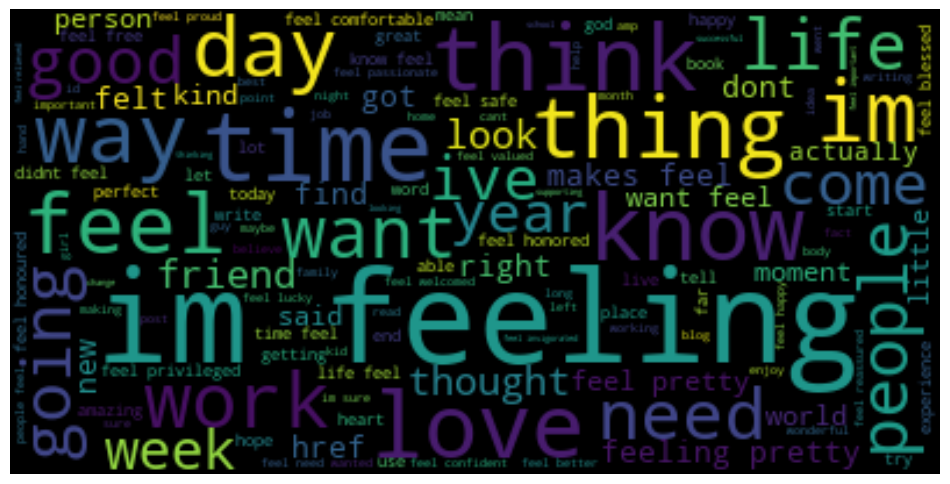

In [49]:
plot_wordcloud(joy_docx)
#We can apply the function on all the other words

In [64]:
#Text  Classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [54]:
data.head()

,text,label,Emotion,clean_text,sentiment
0,i just feel really helpless and heavy hearted,4,fear,feel helpless heavy hearted,Negative
1,ive enjoyed being able to slouch about relax a...,0,sadness,ive enjoyed able slouch relax unwind frankly n...,Positive
2,i gave up my internship with the dmrg and am f...,4,fear,gave internship dmrg feeling distraught,Negative
3,i dont know i feel so lost,0,sadness,dont know feel lost,Neutral
4,i am a kindergarten teacher and i am thoroughl...,4,fear,kindergarten teacher thoroughly weary job take...,Neutral


In [55]:
#our features
X = data['clean_text']
y = data['Emotion']

In [56]:
#converting our text to vectors
our_vec = CountVectorizer()
X = our_vec.fit_transform(X)

In [60]:
#splitting our data
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [65]:
#Creating our model
nv_model =  MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [67]:
#our model prediction
nv_model_prediction = nv_model.predict(X_test)

In [70]:
#our accuracy score
print(f'our naive_bayes model accuracy is {nv_model.score(X_test,y_test) * 100:.2f}%')

our naive_bayes model accuracy is 86.12%


In [75]:
#Making a single prediction
sample_text = ['I am in love with data']
#vectorize our sample text
vect = our_vec.transform(sample_text).toarray()

#our model prediction
nv_model.predict(vect)

array(['joy'], dtype='<U7')

In [78]:
#prediction Probability
nv_model.predict_proba(vect)
np.max(nv_model.predict_proba(vect) * 100)

63.202013316186424

In [84]:
#An emotion prediction function
def predict_emotion(sample_text):
    myvect = our_vec.transform(sample_text).toarray()
    prediction = nv_model.predict(myvect)
    pred_proba = nv_model.predict_proba(myvect)
    all_class_pred_percent = dict(zip(emotion_list,pred_proba[0]))
    print(f'prediction: {prediction[0]}, prediction score: {np.max(pred_proba) * 100:.2f}%')
    return all_class_pred_percent

In [86]:
predict_emotion(['i love you so much'])

prediction: joy, prediction score: 44.74%


{'fear': 0.08218046766697967,
 'sadness': 0.06705090584777183,
 'love': 0.44735331431290776,
 'joy': 0.15345855244678278,
 'suprise': 0.2309235724247922,
 'anger': 0.019033187300765746}

In [87]:
predict_emotion(['i dont like you'])

prediction: sadness, prediction score: 39.24%


{'fear': 0.16689483164358537,
 'sadness': 0.07833780216405192,
 'love': 0.29315693281859395,
 'joy': 0.05844276824359964,
 'suprise': 0.39238558327199347,
 'anger': 0.010782081858175804}

In [91]:
predict_emotion(['i am angry'])

prediction: anger, prediction score: 61.94%


{'fear': 0.6193657359426231,
 'sadness': 0.06913185931372137,
 'love': 0.05792123423526489,
 'joy': 0.015615609629006674,
 'suprise': 0.2309785933126912,
 'anger': 0.006986967566692384}

In [88]:
#Model Evaluation
print(classification_report(y_test,nv_model_prediction))

              precision    recall  f1-score   support

       anger       0.91      0.84      0.87     18834
        fear       0.85      0.81      0.83     15639
         joy       0.84      0.94      0.89     46222
        love       0.85      0.59      0.70     11469
     sadness       0.87      0.94      0.91     40500
     suprise       0.87      0.35      0.50      4883

    accuracy                           0.86    137547
   macro avg       0.87      0.74      0.78    137547
weighted avg       0.86      0.86      0.85    137547

